In [ ]:
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 24.2 MB/s eta 0:00:00


## Library Imports

In [ ]:
import pandas as pd
import mysql.connector
import ast
import numpy as np
from shapely.geometry import shape, Point
import shapely.wkt
from mysql.connector import errorcode
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Processing

### Dropping rows which are anamolie to the group

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MCDA_Hackathon/mainModelAfterProcessing.csv')
print(df.shape)

df = df[df['bathroomCount'] != 5 ]
df = df[df['listingAddress'] != "South Park Street, Halifax, NS"]
df.drop_duplicates(subset=['listingAddress', 'bedroomCount', 'bathroomCount'], inplace = True)
df['listingMinorRegion'] = df['listingMinorRegion'].str.replace('Wooside', 'Woodside')
df = df.drop(1280) # removed rental row because it was misleading data

#Added Values for 4bhk
df.loc[1069, 'listingRent'] += 1400 #Downtown
df.loc[960, 'listingRent'] += 1200 #Downtown
df.loc[717, 'listingRent'] += 1500 #Northend
df.loc[345, 'listingRent'] += 100 #Southend
df.loc[504, 'listingRent'] += 2900 #Southend
df.loc[713, 'listingRent'] += 2750 #Southend
df.loc[1266, 'listingRent'] += 3200 #Southend
df.loc[912, 'listingRent'] -= 600 #Westend
df.loc[82, 'listingRent'] += 1000 #Westend
df.loc[396, 'listingRent'] = 2900 #Westend
df.loc[556, 'listingRent'] = 2250 #Westend
df.loc[718, 'listingRent'] = 3000 #Westend
df.loc[994, 'listingRent'] = 2400 #Westend
df.loc[1102, 'listingRent'] = 2650 #Westend
df.loc[1265, 'listingRent'] = 3300 #Westend
df.loc[1270, 'listingRent'] = 3125 #Westend
df.loc[511, 'listingRent'] = 2100 #Northend
df.loc[187, 'listingRent'] = 2950 #Northend
df.loc[188, 'listingRent'] = 2775 #Northend
df.loc[246, 'listingRent'] = 2300 #Northend
df.loc[731, 'listingRent'] = 3150 #Northend
df.loc[889, 'listingRent'] = 2300 #Northend
df.loc[1288, 'listingRent'] = 2295 #Northend
df.loc[78, 'listingRent'] = 2950 #Burnside
df.loc[36, 'listingRent'] = 3400 #Dartmouth Downtoun
df.loc[57, 'listingRent'] = 3400 #Dartmouth Downtoun
df.loc[128, 'listingRent'] = 3300 #Dartmouth Downtoun
df.loc[0, 'listingRent'] += 400 #Cole Harbour
df.loc[33, 'listingRent'] += 800 #Cole Harbour
df.loc[55, 'listingRent'] += 800 #Cole Harbour
df.loc[86, 'listingRent'] += 800 #Cole Harbour
df.loc[280, 'listingRent'] += 800 #Cole Harbour
df.loc[134, 'listingRent'] += 1450 #Clayton Park
df.loc[139, 'listingRent'] += 1450 #Clayton Park
df.loc[141, 'listingRent'] += 1450 #Clayton Park
df.loc[1088, 'listingRent'] += 1300 #Spryfield
df.loc[105, 'listingRent'] += 1100 #Bedford Basin
df.loc[140, 'listingRent'] += 1200 #Bedford Basin
df.loc[537, 'listingRent'] += 200 #Bedford Basin
df.loc[959, 'listingRent'] += 1000 #Bedford Basin
df.loc[502, 'listingRent'] += 800 #Middle Sackville
df.loc[548, 'listingRent'] += 800 #Peggys
df.loc[1395, 'listingRent'] = (950*5) #Southend 5bhk
df.loc[138, 'listingRent'] = 4625
df.loc[279, 'listingRent'] = 4000
df.loc[8, 'listingRent'] = 3550
df.loc[72, 'listingRent'] = 3550
df.loc[165, 'listingRent'] += 1000
df.loc[176, 'listingRent'] += 800
df.loc[177, 'listingRent'] += 800
df.loc[178, 'listingRent'] += 800
df.loc[1361, 'listingRent'] -= 1300
df.loc[544, 'listingRent'] = (1200*5)
df.loc[43, 'listingRent'] += 300
df.loc[76, 'listingRent'] += 300
df.loc[91, 'listingRent'] += 300
df.loc[160, 'listingRent'] += 300
df.loc[161, 'listingRent'] += 300
df.loc[186, 'listingRent'] += 300
df.loc[872, 'listingRent'] += 900
df.loc[142, 'listingRent'] += 400
df.loc[953, 'listingRent'] = ((900*3) + 450)
df.loc[257, 'listingRent'] -= 600
df.loc[934, 'listingRent'] -= 600
df.loc[61, 'listingRent'] += 500
df.loc[1278, 'listingRent'] += 550
df.loc[252, 'listingRent'] += 200
df.loc[105, 'listingRent'] += 200
df.loc[97, 'listingRent'] += 200
df.loc[162, 'listingRent'] += 200
df.loc[80, 'listingRent'] += 700
df.loc[136, 'listingRent'] += 700
df.loc[787, 'listingRent'] = (1650/2)
df.loc[475, 'listingRent'] = (1500/2)
df.loc[568, 'listingRent'] -= 200
df.loc[254, 'listingRent'] -= 300
df.loc[760, 'listingRent'] -= 300
df.loc[112, 'listingRent'] += 700

# indices_to_drop = [1069, 960, 717, 345, 504, 713, 1266, 912, 82, 396, 556, 718, 994, 1102,
#                    1265, 1270, 511, 187, 188, 246, 731, 889, 1288, 78, 36, 57, 128, 0, 33,
#                    55, 86, 280, 134, 139, 141, 1088, 105, 140, 537, 959, 502, 548, 1395, 138,
#                    279, 8, 72, 165, 176, 177, 178, 1361, 544, 43, 76, 91, 160, 161, 186, 872,
#                    142, 953, 257, 934, 61, 1278, 252, 97, 162, 80, 136, 787, 475, 568, 254, 760, 112]

# Drop these rows
# df = df.drop(indices_to_drop)


df['petPolicy'] = df['petPolicy'].apply(lambda x: 0 if x == 0 else 1)
df['parkingAmenity'] = df['parkingAmenity'].apply(lambda x: 1 if x == "1" or x == "2" else 0)

print(df.shape)
df.head()

(1403, 30)
(1142, 30)


,listingAddress,listingMajorRegion,listingMinorRegion,listingLatitude,listingLongitude,listingType,listingPropertyType,listingSizeSquareFeet,bedroomCount,bathroomCount,heatUtility,waterUtility,hydroUtility,furnishedUtility,petPolicy,smokingPolicy,gymAmenity,parkingAmenity,acAmenity,applianceAmenity,storageAmenity,transitScore,walkScore,bikeScore,crimeScore,retailGroceryScore,retailRecreationScore,educationCenterScore,emergencyCenterScore,listingRent
0,"106 Dalkeith Drive,, Dartmouth, Nova Scotia, B...",Dartmouth,Cole Harbour,44.677295,-63.486580,Management,TownHouse,1558.0,4.0,2.0,0,1,0,0,0,0,0,0,0,0,0,20.0,59,31,Very_Safe,20.0,13.636364,50.000000,31.25,3050.0
1,"303/33 McFatridge Road,, Halifax, Nova Scotia,...",Halifax Peninsula,WestEnd,44.660801,-63.629574,Management,TownHouse,672.0,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,30.0,79,64,Risky,50.0,22.727273,25.000000,25.00,1650.0
2,"2303 Princess Place,, Halifax, Nova Scotia, B3...",Halifax Peninsula,Downtown,44.651273,-63.590736,Management,TownHouse,1809.0,3.0,3.0,0,1,0,0,0,0,0,0,0,0,0,60.0,97,95,Risky,30.0,56.818182,33.333333,43.75,3750.0
3,"Lower/77 Executive Drive,, Sackville, Nova Sco...",Sackville,Middle Sackville,44.791923,-63.713533,Management,TownHouse,697.0,1.0,1.0,0,1,0,0,0,0,0,0,1,0,0,50.0,30,25,Very_Safe,25.0,15.909091,50.000000,31.25,1850.0
4,"222 Victoria Road,, Dartmouth, Nova Scotia, B3...",Dartmouth,Dartmouth Downtown,44.677500,-63.580560,Management,TownHouse,859.0,2.0,1.0,0,1,0,0,0,0,0,0,0,0,1,45.0,81,58,Risky,15.0,25.000000,16.666667,25.00,1850.0


In [ ]:
df['listingMajorRegion'].value_counts()

listingMajorRegion
Halifax Peninsula    522
Dartmouth            270
Mainland Halifax     177
Bedford               83
Sackville             54
Western Passage       14
Eastern Shore         12
Rural                 10
Name: count, dtype: int64

In [ ]:
df.columns

Index(['listingAddress', 'listingMajorRegion', 'listingMinorRegion',
       'listingLatitude', 'listingLongitude', 'listingType',
       'listingPropertyType', 'listingSizeSquareFeet', 'bedroomCount',
       'bathroomCount', 'heatUtility', 'waterUtility', 'hydroUtility',
       'furnishedUtility', 'petPolicy', 'smokingPolicy', 'gymAmenity',
       'parkingAmenity', 'acAmenity', 'applianceAmenity', 'storageAmenity',
       'transitScore', 'walkScore', 'bikeScore', 'crimeScore',
       'retailGroceryScore', 'retailRecreationScore', 'educationCenterScore',
       'emergencyCenterScore', 'listingRent'],
      dtype='object')

### Manually correcting rent of some properties

In [ ]:
addresses = [
    ["Dartmouth, NS B3A", 2000],
    ["Lawrence Street, Dartmouth, NS", 1700],
    ["15 Lakeview Point Road, Dartmouth, NS", 2100],
    ["Lakefront Road, Dartmouth, NS", 2250],
    ["Lakefront Road, Dartmouth, NS", 2250],
    ["5426 Portland Pl, Halifax, NS B3K 1A1", 2500],
    ["5835 Kaye St", 2900],
    ["5831 Inglis St, Halifax, NS B3H 4M9", 1350],
    ["5651 Ogilvie St, Halifax, B3H 1B9", 2400],
    ["5885 Spring Garden Road, Halifax, NS", 2095],
    ["5599 Fenwick St", 1825],
    ["Halifax, NS B3J 1B4", 1800],
    ["5633 Fenwick St, Halifax, NS B3H 4M2", 2490],
    ["Chestnut Street, Halifax, NS", 2800],
    ["South Park St, Halifax, NS B3H 2W4", 2850],
    ["Halifax, NS B3L 1Y4", 2500],
    ["Halifax, NS B3P 2M6", 1500],
    ["235 Willett St, Halifax, NS B3M 3M9", 1800],
    ["15 Borden St, Halifax, NS B3N 2V6", 1600],
    ["Halifax, NS B3S 1M2", 1900],
    ["Halifax, NS B3M 3M9", 1300],
    ["Halifax, NS, B3M4M9", 2400],
    ["Herring Cove Road, Halifax, NS", 1300]
]


for item in addresses:
  df.loc[df['listingAddress'] == item[0], 'listingRent'] = item[1]

### Selecting only Management Properties for Model Training

In [ ]:
# df = df[df['listingType'] == 'Management']
# df.head()

### Adding Hydro and Furnished to 1 for Apartments

In [ ]:
df.head()

,listingAddress,listingMajorRegion,listingMinorRegion,listingLatitude,listingLongitude,listingType,listingPropertyType,listingSizeSquareFeet,bedroomCount,bathroomCount,heatUtility,waterUtility,hydroUtility,furnishedUtility,petPolicy,smokingPolicy,gymAmenity,parkingAmenity,acAmenity,applianceAmenity,storageAmenity,transitScore,walkScore,bikeScore,crimeScore,retailGroceryScore,retailRecreationScore,educationCenterScore,emergencyCenterScore,listingRent
0,"106 Dalkeith Drive,, Dartmouth, Nova Scotia, B...",Dartmouth,Cole Harbour,44.677295,-63.486580,Management,TownHouse,1558.0,4.0,2.0,0,1,0,0,0,0,0,0,0,0,0,20.0,59,31,Very_Safe,20.0,13.636364,50.000000,31.25,3050.0
1,"303/33 McFatridge Road,, Halifax, Nova Scotia,...",Halifax Peninsula,WestEnd,44.660801,-63.629574,Management,TownHouse,672.0,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,30.0,79,64,Risky,50.0,22.727273,25.000000,25.00,1650.0
2,"2303 Princess Place,, Halifax, Nova Scotia, B3...",Halifax Peninsula,Downtown,44.651273,-63.590736,Management,TownHouse,1809.0,3.0,3.0,0,1,0,0,0,0,0,0,0,0,0,60.0,97,95,Risky,30.0,56.818182,33.333333,43.75,3750.0
3,"Lower/77 Executive Drive,, Sackville, Nova Sco...",Sackville,Middle Sackville,44.791923,-63.713533,Management,TownHouse,697.0,1.0,1.0,0,1,0,0,0,0,0,0,1,0,0,50.0,30,25,Very_Safe,25.0,15.909091,50.000000,31.25,1850.0
4,"222 Victoria Road,, Dartmouth, Nova Scotia, B3...",Dartmouth,Dartmouth Downtown,44.677500,-63.580560,Management,TownHouse,859.0,2.0,1.0,0,1,0,0,0,0,0,0,0,0,1,45.0,81,58,Risky,15.0,25.000000,16.666667,25.00,1850.0


### Converting all numerical categories to float

In [ ]:
float_cols = ['listingLatitude', 'listingLongitude', 'listingSizeSquareFeet', 'bedroomCount', 'bathroomCount',
              'heatUtility', 'waterUtility', 'hydroUtility', 'furnishedUtility', 'petPolicy', 'smokingPolicy',
              'gymAmenity', 'parkingAmenity', 'acAmenity', 'applianceAmenity', 'storageAmenity', 'transitScore',
              'walkScore', 'bikeScore', 'retailGroceryScore', 'retailRecreationScore',
              'educationCenterScore', 'emergencyCenterScore', 'listingRent']

for col in float_cols:
    df[col] = df[col].astype(float)

print(df.dtypes)
df.head()

listingAddress            object
listingMajorRegion        object
listingMinorRegion        object
listingLatitude          float64
listingLongitude         float64
listingType               object
listingPropertyType       object
listingSizeSquareFeet    float64
bedroomCount             float64
bathroomCount            float64
heatUtility              float64
waterUtility             float64
hydroUtility             float64
furnishedUtility         float64
petPolicy                float64
smokingPolicy            float64
gymAmenity               float64
parkingAmenity           float64
acAmenity                float64
applianceAmenity         float64
storageAmenity           float64
transitScore             float64
walkScore                float64
bikeScore                float64
crimeScore                object
retailGroceryScore       float64
retailRecreationScore    float64
educationCenterScore     float64
emergencyCenterScore     float64
listingRent              float64
dtype: obj

,listingAddress,listingMajorRegion,listingMinorRegion,listingLatitude,listingLongitude,listingType,listingPropertyType,listingSizeSquareFeet,bedroomCount,bathroomCount,heatUtility,waterUtility,hydroUtility,furnishedUtility,petPolicy,smokingPolicy,gymAmenity,parkingAmenity,acAmenity,applianceAmenity,storageAmenity,transitScore,walkScore,bikeScore,crimeScore,retailGroceryScore,retailRecreationScore,educationCenterScore,emergencyCenterScore,listingRent
0,"106 Dalkeith Drive,, Dartmouth, Nova Scotia, B...",Dartmouth,Cole Harbour,44.677295,-63.486580,Management,TownHouse,1558.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,59.0,31.0,Very_Safe,20.0,13.636364,50.000000,31.25,3050.0
1,"303/33 McFatridge Road,, Halifax, Nova Scotia,...",Halifax Peninsula,WestEnd,44.660801,-63.629574,Management,TownHouse,672.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,79.0,64.0,Risky,50.0,22.727273,25.000000,25.00,1650.0
2,"2303 Princess Place,, Halifax, Nova Scotia, B3...",Halifax Peninsula,Downtown,44.651273,-63.590736,Management,TownHouse,1809.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,97.0,95.0,Risky,30.0,56.818182,33.333333,43.75,3750.0
3,"Lower/77 Executive Drive,, Sackville, Nova Sco...",Sackville,Middle Sackville,44.791923,-63.713533,Management,TownHouse,697.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,50.0,30.0,25.0,Very_Safe,25.0,15.909091,50.000000,31.25,1850.0
4,"222 Victoria Road,, Dartmouth, Nova Scotia, B3...",Dartmouth,Dartmouth Downtown,44.677500,-63.580560,Management,TownHouse,859.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0,81.0,58.0,Risky,15.0,25.000000,16.666667,25.00,1850.0


### Check for nans and Null

In [ ]:
null_values = df.isnull().any()
print(null_values)

listingAddress           False
listingMajorRegion       False
listingMinorRegion       False
listingLatitude          False
listingLongitude         False
listingType              False
listingPropertyType      False
listingSizeSquareFeet    False
bedroomCount             False
bathroomCount            False
heatUtility              False
waterUtility             False
hydroUtility             False
furnishedUtility         False
petPolicy                False
smokingPolicy            False
gymAmenity               False
parkingAmenity           False
acAmenity                False
applianceAmenity         False
storageAmenity           False
transitScore             False
walkScore                False
bikeScore                False
crimeScore               False
retailGroceryScore       False
retailRecreationScore    False
educationCenterScore     False
emergencyCenterScore     False
listingRent              False
dtype: bool


## Find Min, Max listingRents and remove outliers

In [ ]:
df['listingRent'].min()

650.0

In [ ]:
print(df.shape)
df = df[df['listingRent'] >= 900]
print(df.shape)
df = df[df['listingRent'] <= 5000]
print(df.shape)
df = df[df['listingSizeSquareFeet'] >= 500]
print(df.shape)

(1142, 30)
(1134, 30)
(1132, 30)
(1075, 30)


In [ ]:
df = df[df['listingMajorRegion'] != 'Eastern Shore']
df = df[df['listingMajorRegion'] != 'Western Passage']
df = df[df['listingMajorRegion'] != 'Rural']
df = df[df['listingMinorRegion'] != 'Bayers Lake']
df.shape

(1044, 30)

### Checking Avg listingRent Region Wise

In [ ]:
halifax_peninsula = df[df['listingMajorRegion'] == 'Halifax Peninsula']
dartmouth = df[df['listingMajorRegion'] == 'Dartmouth']
mainland_halifax = df[df['listingMajorRegion'] == 'Mainland Halifax']
bedford = df[df['listingMajorRegion'] == 'Bedford']
sackville = df[df['listingMajorRegion'] == 'Sackville']
eastern_shore = df[df['listingMajorRegion'] == 'Eastern Shore']
western_shore = df[df['listingMajorRegion'] == 'Western Passage']
rural = df[df['listingMajorRegion'] == 'Rural']

In [ ]:
average_rent = sackville.groupby(['listingMinorRegion', 'bedroomCount'])['listingSizeSquareFeet'].mean().reset_index()
average_rent_1_to_4_bhk = average_rent[average_rent['bedroomCount'].isin([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0])]
average_rent_1_to_4_bhk

,listingMinorRegion,bedroomCount,listingSizeSquareFeet
1,Lower Sackville,1.0,753.111111
2,Lower Sackville,2.0,957.333333
3,Lower Sackville,2.5,1228.000000
4,Lower Sackville,3.0,1226.285714
5,Lower Sackville,4.0,1777.666667
7,Middle Sackville,1.0,736.750000
8,Middle Sackville,2.0,1250.000000
9,Middle Sackville,3.0,1414.333333


In [ ]:
import pandas as pd
import numpy as np

def assign_region_bedroom_specific_square_feet(df, region_bedroom_ranges):
    result_df = df.copy()
    for region, bedroom_ranges in region_bedroom_ranges.items():
        for bedrooms, sqft_range in bedroom_ranges.items():
            mask = (result_df['listingMinorRegion'] == region) & (result_df['bedroomCount'] == bedrooms)
            result_df.loc[mask, 'listingSizeSquareFeet'] = np.random.randint(sqft_range[0], sqft_range[1] + 1, size=mask.sum())
    return result_df

region_bedroom_ranges = {
    'Downtown':
     {
        1.5: (700, 750),
        4.0: (1300, 1500)
    },

    'NorthEnd':
     {
        2.5: (1200, 1300),
        3.0: (1300, 1400),
        4.0: (1400, 1500)
     },

    'SouthEnd':
     {
        2.5: (960, 1000)
     },

    'WestEnd':
     {
        3.5: (1350, 14050),
     },

    'Burnside':
     {
        2.0: (950, 1200),
	      3.0: (1300, 1400)
    },

    'Cole Harbour':
     {
        1.0: (700, 800),
	      1.5: (800, 910)
    },

    'Dartmouth Downtown':
     {
        2.5: (940, 980),
	      5.0: (1769, 1850)
    },

    'Eastern Passage':
     {
        2.5: (859, 900)
     },

    'Woodside':
     {
        3.0: (1314, 1400)
     },

    'Armdale':
     {
        2.0: (950, 1000),
    },


    'Clayton Park':
        {
            1.5: (900, 1000),
        },

    'Spryfield':
        {
            2.0: (900, 1000),
        },

    'Bedford Basin':
     {
        3.0: (1350, 1450),
    },

    'Lower Sackville':
     {
        3.0: (1350, 1450),

    },


}


df = assign_region_bedroom_specific_square_feet(df, region_bedroom_ranges)

In [ ]:
df[(df['bedroomCount'] == 2.5) & (df['listingMinorRegion'] == 'St Margarets Bay')]

,listingAddress,listingMajorRegion,listingMinorRegion,listingLatitude,listingLongitude,listingType,listingPropertyType,listingSizeSquareFeet,bedroomCount,bathroomCount,heatUtility,waterUtility,hydroUtility,furnishedUtility,petPolicy,smokingPolicy,gymAmenity,parkingAmenity,acAmenity,applianceAmenity,storageAmenity,transitScore,walkScore,bikeScore,crimeScore,retailGroceryScore,retailRecreationScore,educationCenterScore,emergencyCenterScore,listingRent


In [ ]:
# df.loc[254, 'listingRent'] -= 300
# df.loc[760, 'listingRent'] -= 300
# df.loc[112, 'listingRent'] += 700

In [ ]:
df.head()

,listingAddress,listingMajorRegion,listingMinorRegion,listingLatitude,listingLongitude,listingType,listingPropertyType,listingSizeSquareFeet,bedroomCount,bathroomCount,heatUtility,waterUtility,hydroUtility,furnishedUtility,petPolicy,smokingPolicy,gymAmenity,parkingAmenity,acAmenity,applianceAmenity,storageAmenity,transitScore,walkScore,bikeScore,crimeScore,retailGroceryScore,retailRecreationScore,educationCenterScore,emergencyCenterScore,listingRent
0,"106 Dalkeith Drive,, Dartmouth, Nova Scotia, B...",Dartmouth,Cole Harbour,44.677295,-63.486580,Management,TownHouse,1558.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,59.0,31.0,Very_Safe,20.0,13.636364,50.000000,31.25,3050.0
1,"303/33 McFatridge Road,, Halifax, Nova Scotia,...",Halifax Peninsula,WestEnd,44.660801,-63.629574,Management,TownHouse,672.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,79.0,64.0,Risky,50.0,22.727273,25.000000,25.00,1650.0
2,"2303 Princess Place,, Halifax, Nova Scotia, B3...",Halifax Peninsula,Downtown,44.651273,-63.590736,Management,TownHouse,1809.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,97.0,95.0,Risky,30.0,56.818182,33.333333,43.75,3750.0
3,"Lower/77 Executive Drive,, Sackville, Nova Sco...",Sackville,Middle Sackville,44.791923,-63.713533,Management,TownHouse,697.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,50.0,30.0,25.0,Very_Safe,25.0,15.909091,50.000000,31.25,1850.0
4,"222 Victoria Road,, Dartmouth, Nova Scotia, B3...",Dartmouth,Dartmouth Downtown,44.677500,-63.580560,Management,TownHouse,859.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0,81.0,58.0,Risky,15.0,25.000000,16.666667,25.00,1850.0


### Training and Testing Split

In [ ]:
df.head()

,listingAddress,listingMajorRegion,listingMinorRegion,listingLatitude,listingLongitude,listingType,listingPropertyType,listingSizeSquareFeet,bedroomCount,bathroomCount,heatUtility,waterUtility,hydroUtility,furnishedUtility,petPolicy,smokingPolicy,gymAmenity,parkingAmenity,acAmenity,applianceAmenity,storageAmenity,transitScore,walkScore,bikeScore,crimeScore,retailGroceryScore,retailRecreationScore,educationCenterScore,emergencyCenterScore,listingRent
0,"106 Dalkeith Drive,, Dartmouth, Nova Scotia, B...",Dartmouth,Cole Harbour,44.677295,-63.486580,Management,TownHouse,1558.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,59.0,31.0,Very_Safe,20.0,13.636364,50.000000,31.25,3050.0
1,"303/33 McFatridge Road,, Halifax, Nova Scotia,...",Halifax Peninsula,WestEnd,44.660801,-63.629574,Management,TownHouse,672.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,79.0,64.0,Risky,50.0,22.727273,25.000000,25.00,1650.0
2,"2303 Princess Place,, Halifax, Nova Scotia, B3...",Halifax Peninsula,Downtown,44.651273,-63.590736,Management,TownHouse,1809.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,97.0,95.0,Risky,30.0,56.818182,33.333333,43.75,3750.0
3,"Lower/77 Executive Drive,, Sackville, Nova Sco...",Sackville,Middle Sackville,44.791923,-63.713533,Management,TownHouse,697.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,50.0,30.0,25.0,Very_Safe,25.0,15.909091,50.000000,31.25,1850.0
4,"222 Victoria Road,, Dartmouth, Nova Scotia, B3...",Dartmouth,Dartmouth Downtown,44.677500,-63.580560,Management,TownHouse,859.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0,81.0,58.0,Risky,15.0,25.000000,16.666667,25.00,1850.0


### Check columns which might not impact Model Performance

In [ ]:
# columns_to_drop = ['listingType']
# df = df.drop(columns=columns_to_drop, axis=1)

In [ ]:
print(df.shape)
df = df[df['bedroomCount'] != 5.0]
df = df[df['bedroomCount'] != 3.5]
df = df[df['bedroomCount'] != 4.5]
print(df.shape)

(1044, 30)
(1032, 30)


In [ ]:
# df = df.drop('smokingPolicy', axis=1)
# df.loc[df['listingPropertyType'] == 'Apartment', 'hydroUtility'] = 1
# df.loc[df['listingPropertyType'] == 'Apartment', 'furnishedUtility'] = 1

In [ ]:
df.columns

Index(['listingAddress', 'listingMajorRegion', 'listingMinorRegion',
       'listingLatitude', 'listingLongitude', 'listingType',
       'listingPropertyType', 'listingSizeSquareFeet', 'bedroomCount',
       'bathroomCount', 'heatUtility', 'waterUtility', 'hydroUtility',
       'furnishedUtility', 'petPolicy', 'smokingPolicy', 'gymAmenity',
       'parkingAmenity', 'acAmenity', 'applianceAmenity', 'storageAmenity',
       'transitScore', 'walkScore', 'bikeScore', 'crimeScore',
       'retailGroceryScore', 'retailRecreationScore', 'educationCenterScore',
       'emergencyCenterScore', 'listingRent'],
      dtype='object')

In [ ]:
df.head()

,listingAddress,listingMajorRegion,listingMinorRegion,listingLatitude,listingLongitude,listingType,listingPropertyType,listingSizeSquareFeet,bedroomCount,bathroomCount,heatUtility,waterUtility,hydroUtility,furnishedUtility,petPolicy,smokingPolicy,gymAmenity,parkingAmenity,acAmenity,applianceAmenity,storageAmenity,transitScore,walkScore,bikeScore,crimeScore,retailGroceryScore,retailRecreationScore,educationCenterScore,emergencyCenterScore,listingRent
0,"106 Dalkeith Drive,, Dartmouth, Nova Scotia, B...",Dartmouth,Cole Harbour,44.677295,-63.486580,Management,TownHouse,1558.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,59.0,31.0,Very_Safe,20.0,13.636364,50.000000,31.25,3050.0
1,"303/33 McFatridge Road,, Halifax, Nova Scotia,...",Halifax Peninsula,WestEnd,44.660801,-63.629574,Management,TownHouse,672.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,79.0,64.0,Risky,50.0,22.727273,25.000000,25.00,1650.0
2,"2303 Princess Place,, Halifax, Nova Scotia, B3...",Halifax Peninsula,Downtown,44.651273,-63.590736,Management,TownHouse,1809.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,97.0,95.0,Risky,30.0,56.818182,33.333333,43.75,3750.0
3,"Lower/77 Executive Drive,, Sackville, Nova Sco...",Sackville,Middle Sackville,44.791923,-63.713533,Management,TownHouse,697.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,50.0,30.0,25.0,Very_Safe,25.0,15.909091,50.000000,31.25,1850.0
4,"222 Victoria Road,, Dartmouth, Nova Scotia, B3...",Dartmouth,Dartmouth Downtown,44.677500,-63.580560,Management,TownHouse,859.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0,81.0,58.0,Risky,15.0,25.000000,16.666667,25.00,1850.0


In [ ]:
# df.to_csv("SameerModelData.csv", index=False)

In [ ]:
data = pd.read_csv("SameerModelData.csv")
print(data.shape)
data.columns

(1032, 30)


Index(['listingAddress', 'listingMajorRegion', 'listingMinorRegion',
       'listingLatitude', 'listingLongitude', 'listingType',
       'listingPropertyType', 'listingSizeSquareFeet', 'bedroomCount',
       'bathroomCount', 'heatUtility', 'waterUtility', 'hydroUtility',
       'furnishedUtility', 'petPolicy', 'smokingPolicy', 'gymAmenity',
       'parkingAmenity', 'acAmenity', 'applianceAmenity', 'storageAmenity',
       'transitScore', 'walkScore', 'bikeScore', 'crimeScore',
       'retailGroceryScore', 'retailRecreationScore', 'educationCenterScore',
       'emergencyCenterScore', 'listingRent'],
      dtype='object')

In [ ]:
from sklearn.utils import shuffle
import numpy as np

# Function to upsample data within each group
def upsample_group(df_group):
    new_entries = []
    for _, row in df_group.iterrows():
        # Generate a variance between -50 and 50
        varianceRent = np.random.randint(-120, 120)
        varianceSize = np.random.randint(-50, 50)

        # Apply the variance to listingSizeSquareFeet and listingRent
        new_size = max(0, row['listingSizeSquareFeet'] + varianceSize)  # Ensure non-negative values
        new_rent = max(0, row['listingRent'] + varianceRent)  # Ensure non-negative values

        # Clone the current row and update with new values
        new_row = row.copy()
        new_row['listingSizeSquareFeet'] = new_size
        new_row['listingRent'] = new_rent

        new_entries.append(new_row)

    return pd.DataFrame(new_entries)

# Group by 'listingMajorRegion' and 'listingMinorRegion', and apply the upsample function
upsampled_data = data.groupby(['listingMajorRegion', 'listingMinorRegion']).apply(upsample_group).reset_index(drop=True)

# Combine the original and upsampled data
combined_data = pd.concat([data, upsampled_data], ignore_index=True)

# Shuffle the combined dataset to mix original and upsampled rows
final_data = shuffle(combined_data, random_state=42)

# Show the size of the original, upsampled, and final combined dataset
original_size = data.shape[0]
upsampled_size = upsampled_data.shape[0]
final_size = final_data.shape[0]

final_data.head()

,listingAddress,listingMajorRegion,listingMinorRegion,listingLatitude,listingLongitude,listingType,listingPropertyType,listingSizeSquareFeet,bedroomCount,bathroomCount,heatUtility,waterUtility,hydroUtility,furnishedUtility,petPolicy,smokingPolicy,gymAmenity,parkingAmenity,acAmenity,applianceAmenity,storageAmenity,transitScore,walkScore,bikeScore,crimeScore,retailGroceryScore,retailRecreationScore,educationCenterScore,emergencyCenterScore,listingRent
1667,"Halifax, NS B3J 1A5",Halifax Peninsula,SouthEnd,44.639369,-63.573484,Rental,Apartment,929.0,2.5,1.5,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,60.0,98.0,56.0,Safe,25.0,38.636364,25.000000,56.25,1031.0
480,"2001 Brunswick Street, Halifax, NS, B3J 3L8",Halifax Peninsula,Downtown,44.650566,-63.578320,Rental,Apartment,741.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,40.0,97.0,64.0,Risky,25.0,40.909091,41.666667,56.25,1950.0
905,"Dartmouth, Dartmouth, Nova Scotia, B3A 4M6, Ca...",Dartmouth,Dartmouth Downtown,44.671275,-63.588364,Management,TownHouse,750.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,55.0,76.0,62.0,Risky,25.0,29.545455,33.333333,37.50,1695.0
1151,"104 Pinecrest Drive, Dartmouth, NS, B3A 2J9",Dartmouth,Burnside,44.686229,-63.586054,Rental,Apartment,1350.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,45.0,65.0,41.0,Dangerous,15.0,15.909091,33.333333,6.25,2323.0
29,"4/36 Gebhardt Street,, Halifax, Nova Scotia, B...",Mainland Halifax,Clayton Park,44.658225,-63.641443,Management,TownHouse,859.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,82.0,45.0,Dangerous,45.0,20.454545,25.000000,12.50,1850.0


In [ ]:
final_data = final_data.reset_index(drop=True)
print(final_data.shape)
final_data.columns

(2064, 30)


Index(['listingAddress', 'listingMajorRegion', 'listingMinorRegion',
       'listingLatitude', 'listingLongitude', 'listingType',
       'listingPropertyType', 'listingSizeSquareFeet', 'bedroomCount',
       'bathroomCount', 'heatUtility', 'waterUtility', 'hydroUtility',
       'furnishedUtility', 'petPolicy', 'smokingPolicy', 'gymAmenity',
       'parkingAmenity', 'acAmenity', 'applianceAmenity', 'storageAmenity',
       'transitScore', 'walkScore', 'bikeScore', 'crimeScore',
       'retailGroceryScore', 'retailRecreationScore', 'educationCenterScore',
       'emergencyCenterScore', 'listingRent'],
      dtype='object')

In [ ]:
# Assuming `preprocessor` is your ColumnTransformer
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical columns
categorical_cols = ['listingMajorRegion', 'listingMinorRegion', 'listingType',
                    'listingPropertyType', 'crimeScore']

numerical_cols = ['listingSizeSquareFeet', 'bedroomCount', 'listingLatitude', 'listingLongitude',
                  'bathroomCount', 'heatUtility', 'waterUtility', 'hydroUtility', 'furnishedUtility',
                  'petPolicy', 'smokingPolicy','gymAmenity', 'parkingAmenity', 'acAmenity', 'applianceAmenity',
                  'storageAmenity', 'transitScore', 'walkScore', 'bikeScore', 'retailGroceryScore',
                  'retailRecreationScore', 'educationCenterScore', 'emergencyCenterScore']

# Define transformers
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()


# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Split data into features and target
X = final_data.drop(['listingAddress', 'listingRent'], axis=1)  # Exclude ID and Address as they are not relevant for prediction
y = final_data['listingRent']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

X_train_prepared.shape, X_test_prepared.shape

((1651, 52), (413, 52))

### HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

scoring_metrics = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'R2': 'r2',
    'RMSE': 'neg_root_mean_squared_error',
    'MedAE': 'neg_median_absolute_error',
    'MSLE': 'neg_mean_squared_log_error',
    'ExplainedVariance': 'explained_variance'
}

# Example for Ridge Regression
# ridge_params = {
#     'alpha': [0.1, 1.0, 10.0]
# }

# ridge_grid_search = GridSearchCV(Ridge(), ridge_params, cv=5, scoring=scoring_metrics, refit='R2')
# ridge_grid_search.fit(X_train_prepared, y_train)



# Example for Random Forest Regressor
# rf_params = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5]
# }

# rf_grid_search = GridSearchCV(RandomForestRegressor(), rf_params, cv=5, scoring=scoring_metrics, refit='R2')
# rf_grid_search.fit(X_train_prepared, y_train)



# SVR Hyperparameters
# svr_params = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']
# }

# svr_grid_search = GridSearchCV(SVR(), svr_params, cv=5, scoring=scoring_metrics, refit='R2')
# svr_grid_search.fit(X_train_prepared, y_train)



# Gradient Boosting Hyperparameters
# gb_params = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.01, 0.1],
#     'max_depth': [3, 5]
# }

# gb_grid_search = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5, scoring=scoring_metrics, refit='R2')
# gb_grid_search.fit(X_train_prepared, y_train)



# XGBoost Hyperparameters
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'min_child_weight': [2, 5],
    'gamma': [0.1, 0.2],
    'reg_alpha': [0.1, 1],
    'reg_lambda': [0.1, 0.01]
}

xgb_grid_search = GridSearchCV(XGBRegressor(), xgb_params, scoring=scoring_metrics, verbose=1, n_jobs=-1, refit='R2')
xgb_grid_search.fit(X_train_prepared, y_train)


# ElasticNet Hyperparameters
# elastic_net_params = {
#     'alpha': [0.1, 1, 10],
#     'l1_ratio': [0.1, 0.5, 0.9]
# }

# elastic_net_grid_search = GridSearchCV(ElasticNet(), elastic_net_params, cv=5, scoring=scoring_metrics, refit='R2')
# elastic_net_grid_search.fit(X_train_prepared, y_train)



# # KNN Hyperparameters
# knn_params = {
#     'n_neighbors': [3, 5, 7],
#     'weights': ['uniform', 'distance']
# }

# knn_grid_search = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring=scoring_metrics, refit='R2')
# knn_grid_search.fit(X_train_prepared, y_train)



# Decision Tree Hyperparameters
# dt_params = {
#     'max_depth': [None, 3, 5, 10],
#     'min_samples_split': [2, 5, 10]
# }

# dt_grid_search = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5, scoring=scoring_metrics, refit='R2')
# dt_grid_search.fit(X_train_prepared, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                         'min_child_weight': [2, 5], 'n_estimators': [100, 200],
                         'reg_alpha': [0.1, 1], 'reg_lambda': [0.1, 0.01],
                         'subsample': [0.7, 0.9]},
             refit='R2',
             scoring={'ExplainedVariance': 'explained_variance',
                      'MAE': 'neg_mean_absolute_error',
                      'MSE': 'neg_mean_squared_error',
                      'MSLE': 'neg_mean_squared_log_error',
                      'MedAE': 'neg_median_absolute_error', 'R2': 'r2',
                      'RMSE': 'neg_root_mean_squared_error'},
             verbose=1)

In [ ]:
xgb_grid_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Fine-Tuned Model Results

In [ ]:
from sklearn.metrics import mean_absolute_error

# Evaluate Ridge Regression
# best_ridge = ridge_grid_search.best_estimator_
# ridge_predictions = best_ridge.predict(X_test_prepared)


# # Evaluate Random Forest Regressor
# best_rf = rf_grid_search.best_estimator_
# rf_predictions = best_rf.predict(X_test_prepared)


# # Evaluate Support Vector Regression
# best_svr = svr_grid_search.best_estimator_
# svr_predictions = best_svr.predict(X_test_prepared)


# # Evaluate Gradient Boosting Regressor
# best_gb = gb_grid_search.best_estimator_
# gb_predictions = best_gb.predict(X_test_prepared)


# Evaluate XGBoost Regressor
best_xgb = xgb_grid_search.best_estimator_
xgb_predictions = best_xgb.predict(X_test_prepared)


# # Evaluate LightGBM Regressor
# best_lgb = lgb_grid_search.best_estimator_
# lgb_predictions = best_lgb.predict(X_test_prepared)


# Evaluate ElasticNet
# best_elastic_net = elastic_net_grid_search.best_estimator_
# elastic_net_predictions = best_elastic_net.predict(X_test_prepared)


# # Evaluate K-Nearest Neighbors Regressor
# best_knn = knn_grid_search.best_estimator_
# knn_predictions = best_knn.predict(X_test_prepared)


# # Evaluate Decision Tree Regressor
# best_dt = dt_grid_search.best_estimator_
# dt_predictions = best_dt.predict(X_test_prepared)



from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, mean_squared_log_error, explained_variance_score

# Function to calculate and print all metrics
def evaluate_model_performance(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    msle = mean_squared_log_error(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"  MAE: {mae:.2f}")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R2: {r2:.2f}")
    print(f"  Median AE: {medae:.2f}")
    print(f"  MSLE: {msle:.2f}")
    print(f"  Explained Variance: {evs:.2f}")
    print("\n")

# Assuming y_test and the prediction arrays (e.g., ridge_predictions) are already defined
# evaluate_model_performance(y_test, ridge_predictions, "Ridge Regression")
# evaluate_model_performance(y_test, rf_predictions, "Random Forest Regressor")
# evaluate_model_performance(y_test, svr_predictions, "SVR")
# evaluate_model_performance(y_test, gb_predictions, "Gradient Boosting Regressor")
evaluate_model_performance(y_test, xgb_predictions, "XGBoost Regressor")
# evaluate_model_performance(y_test, lgb_predictions, "LightGBM Regressor")
# evaluate_model_performance(y_test, elastic_net_predictions, "ElasticNet")
# evaluate_model_performance(y_test, knn_predictions, "KNN Regressor")
# evaluate_model_performance(y_test, dt_predictions, "Decision Tree Regressor")

XGBoost Regressor Performance:
  MAE: 114.95
  MSE: 27850.70
  RMSE: 166.89
  R2: 0.89
  Median AE: 89.27
  MSLE: 0.01
  Explained Variance: 0.90




In [ ]:
import pickle

# Save the model to disk
model_filename = 'best_xgb_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(best_xgb, file)

print(f"Model saved to {model_filename}")

Model saved to best_xgb_model.pkl


In [ ]:
import pandas as pd
import pickle

# Load the saved preprocessor and model
with open('preprocessor.pkl', 'rb') as file:
    loaded_preprocessor = pickle.load(file)

with open('best_xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Load new data
csv_filename = '/content/SameerModelData.csv'
new_data = pd.read_csv(csv_filename)

# Apply the same preprocessing to this new data
# Note: Ensure new_data contains all the expected columns except 'listingAddress' and 'listingRent'
new_data_prepared = loaded_preprocessor.transform(new_data)

# Make predictions
predictions = loaded_model.predict(new_data_prepared)

# Add the predictions to your DataFrame
new_data['PredictedListingRent'] = predictions
new_data.head(1000)

In [ ]:
XGBoost Regressor Performance:
  MAE: 128.51
  MSE: 38362.71
  RMSE: 195.86
  R2: 0.88
  Median AE: 86.39
  MSLE: 0.01
  Explained Variance: 0.88

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, mean_squared_log_error, explained_variance_score

def evaluate_model_performance(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    msle = mean_squared_log_error(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"  MAE: {mae:.2f}")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R2: {r2:.2f}")
    print(f"  Median AE: {medae:.2f}")
    print(f"  MSLE: {msle:.2f}")
    print(f"  Explained Variance: {evs:.2f}")
    print("\n")

# Assuming y_test and X_test_prepared are defined and you've fitted the models as previously shown

# Ridge Regression Evaluation
y_pred_ridge = ridge_model.predict(X_test_prepared)
evaluate_model_performance(y_test, y_pred_ridge, 'Ridge Regression')

# Random Forest Regression Evaluation
y_pred_rf = rf_model.predict(X_test_prepared)
evaluate_model_performance(y_test, y_pred_rf, 'Random Forest Regressor')

# SVR Evaluation
y_pred_svr = svr_model.predict(X_test_prepared)
evaluate_model_performance(y_test, y_pred_svr, 'SVR')

# Gradient Boosting Regression Evaluation
y_pred_gb = gb_model.predict(X_test_prepared)
evaluate_model_performance(y_test, y_pred_gb, 'Gradient Boosting Regressor')

# XGBoost Regression Evaluation
y_pred_xgb = xgb_model.predict(X_test_prepared)
evaluate_model_performance(y_test, y_pred_xgb, 'XGBoost Regressor')

# LightGBM Regression Evaluation
y_pred_lgbm = lgbm_model.predict(X_test_prepared)
evaluate_model_performance(y_test, y_pred_lgbm, 'LightGBM Regressor')

# ElasticNet Evaluation
y_pred_elastic_net = elastic_net_model.predict(X_test_prepared)
evaluate_model_performance(y_test, y_pred_elastic_net, 'ElasticNet')

# K-Nearest Neighbors Regression Evaluation
y_pred_knn = knn_model.predict(X_test_prepared)
evaluate_model_performance(y_test, y_pred_knn, 'K-Nearest Neighbors Regressor')

# Decision Tree Regression Evaluation
y_pred_dt = dt_model.predict(X_test_prepared)
evaluate_model_performance(y_test, y_pred_dt, 'Decision Tree Regressor')


Ridge Regression Performance:
  MAE: 261.68
  MSE: 131643.69
  RMSE: 362.83
  R2: 0.62
  Median AE: 189.76
  MSLE: 0.03
  Explained Variance: 0.62


Random Forest Regressor Performance:
  MAE: 207.90
  MSE: 100134.80
  RMSE: 316.44
  R2: 0.71
  Median AE: 124.48
  MSLE: 0.02
  Explained Variance: 0.71


SVR Performance:
  MAE: 438.58
  MSE: 357113.76
  RMSE: 597.59
  R2: -0.04
  Median AE: 333.71
  MSLE: 0.07
  Explained Variance: 0.03


Gradient Boosting Regressor Performance:
  MAE: 212.03
  MSE: 92219.97
  RMSE: 303.68
  R2: 0.73
  Median AE: 152.79
  MSLE: 0.02
  Explained Variance: 0.73


XGBoost Regressor Performance:
  MAE: 210.92
  MSE: 90085.77
  RMSE: 300.14
  R2: 0.74
  Median AE: 148.80
  MSLE: 0.02
  Explained Variance: 0.74


LightGBM Regressor Performance:
  MAE: 223.60
  MSE: 99608.47
  RMSE: 315.61
  R2: 0.71
  Median AE: 154.93
  MSLE: 0.02
  Explained Variance: 0.71


ElasticNet Performance:
  MAE: 273.31
  MSE: 149343.56
  RMSE: 386.45
  R2: 0.57
  Median AE: 199.00

### 5-Fold Validation on Fine-Tuned Models

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import numpy as np

def evaluate_model_with_kfold(model, X, y, n_splits=5, scoring=['neg_mean_absolute_error']):
    scores = cross_validate(model, X, y, cv=n_splits, scoring=scoring, return_train_score=False)

    for score_name in scoring:
        score_name_key = f'test_{score_name}'
        score_values = scores[score_name_key]
        if 'neg_' in score_name:
            score_values = -score_values  # Negate to make positive if necessary
        print(f"{score_name.replace('neg_', '').replace('_', ' ').title()} scores for each fold: {score_values}")
        print(f"Average {score_name.replace('neg_', '').replace('_', ' ').title()}: {score_values.mean():.2f} ± {score_values.std():.2f}")


scoring_metrics = [
    'neg_mean_absolute_error',
    'neg_mean_squared_error',
    'r2',
    'neg_root_mean_squared_error',
    'neg_median_absolute_error',
    'neg_mean_squared_log_error',
    'explained_variance'
]

# # Ridge Regression
# print("Ridge Regression:")
# evaluate_model_with_kfold(ridge_grid_search.best_estimator_, X_train_prepared, y_train, scoring=scoring_metrics)

# # Random Forest Regressor
# print("\nRandom Forest Regressor:")
# evaluate_model_with_kfold(rf_grid_search.best_estimator_, X_train_prepared, y_train, scoring=scoring_metrics)

# # SVR
# print("\nSVR:")
# evaluate_model_with_kfold(svr_grid_search.best_estimator_, X_train_prepared, y_train, scoring=scoring_metrics)

# # Gradient Boosting Regressor
# print("\nGradient Boosting Regressor:")
# evaluate_model_with_kfold(gb_grid_search.best_estimator_, X_train_prepared, y_train, scoring=scoring_metrics)

# XGBoost Regressor
print("\nXGBoost Regressor:")
evaluate_model_with_kfold(xgb_grid_search.best_estimator_, X_train_prepared, y_train, scoring=scoring_metrics)

# # LightGBM Regressor
# print("\nLightGBM Regressor:")
# evaluate_model_with_kfold(lgb_grid_search.best_estimator_, X_train_prepared, y_train, scoring=scoring_metrics)

# ElasticNet
# print("\nElasticNet:")
# evaluate_model_with_kfold(elastic_net_grid_search.best_estimator_, X_train_prepared, y_train, scoring=scoring_metrics)

# # K-Nearest Neighbors Regressor (KNN)
# print("\nKNN Regressor:")
# evaluate_model_with_kfold(knn_grid_search.best_estimator_, X_train_prepared, y_train, scoring=scoring_metrics)

# # Decision Tree Regressor
# print("\nDecision Tree Regressor:")
# evaluate_model_with_kfold(dt_grid_search.best_estimator_, X_train_prepared, y_train, scoring=scoring_metrics)


XGBoost Regressor:
Mean Absolute Error scores for each fold: [144.41518437 137.60908462 138.60869806 149.54955518 140.04002981]
Average Mean Absolute Error: 142.04 ± 4.41
Mean Squared Error scores for each fold: [42140.38550664 41491.88781869 45831.46134292 67253.80688819
 48998.37999592]
Average Mean Squared Error: 49143.18 ± 9450.55
R2 scores for each fold: [0.86486863 0.85240401 0.85790338 0.81865123 0.79808788]
Average R2: 0.84 ± 0.03
Root Mean Squared Error scores for each fold: [205.28123515 203.69557634 214.08283757 259.33338946 221.35577697]
Average Root Mean Squared Error: 220.75 ± 20.32
Median Absolute Error scores for each fold: [99.92211914 95.24401855 92.47473145 95.66320801 86.80566406]
Average Median Absolute Error: 94.02 ± 4.32
Mean Squared Log Error scores for each fold: [0.00987998 0.00865856 0.01003548 0.01312322 0.01295672]
Average Mean Squared Log Error: 0.01 ± 0.00
Explained Variance scores for each fold: [0.86549124 0.8533357  0.8579908  0.8189243  0.80044234]
A

### Model Visualization

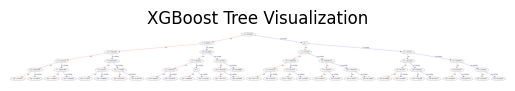

<Figure size 2e+06x2e+06 with 0 Axes>

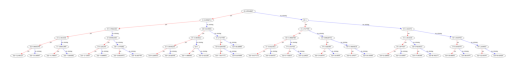

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Visualize the first tree
xgb.plot_tree(best_xgb, num_trees=0)
plt.title("XGBoost Tree Visualization")
plt.show()

# For a larger model, you might need to increase the figure size
plt.figure(figsize=(20000, 20000))
xgb.plot_tree(best_xgb, num_trees=0)
plt.show()

In [ ]:
!pip install shap

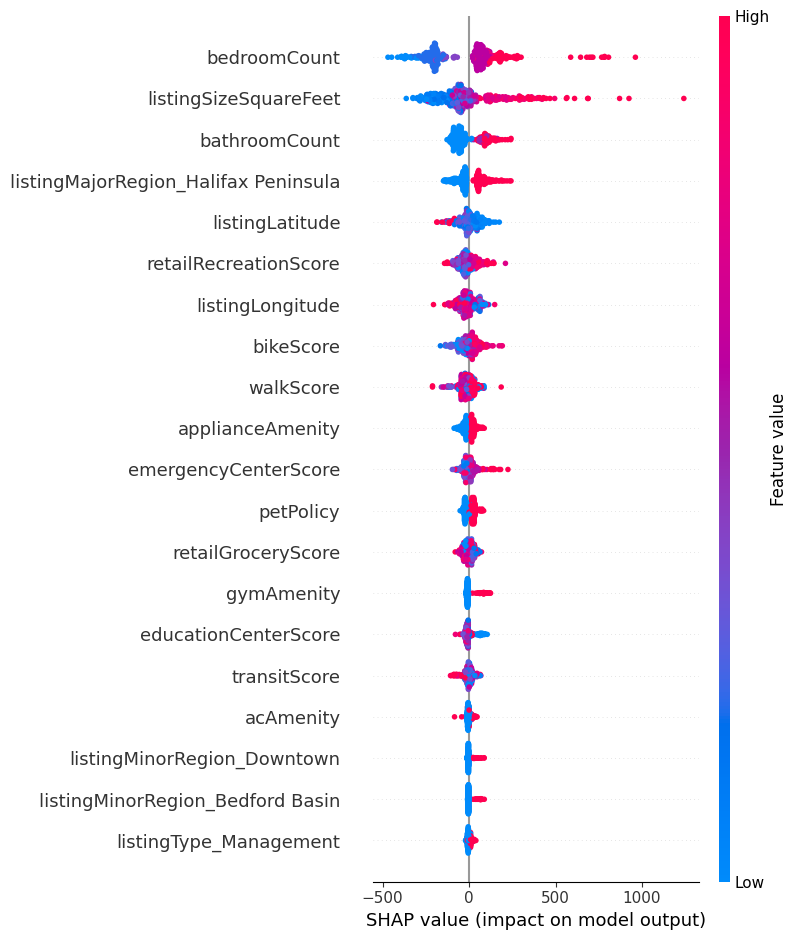

In [ ]:
import pandas as pd
import shap

# Function to get feature names from ColumnTransformer
def get_feature_names(column_transformer):
    feature_names = []

    # Loop over all transformers in the column transformer
    for transformer_name, transformer, original_features in column_transformer.transformers_:
        if transformer_name == 'remainder':
            continue

        if hasattr(transformer, 'get_feature_names_out'):
            # If a transformer has the 'get_feature_names_out' method, use it
            names = transformer.get_feature_names_out(original_features)
        else:
            # Otherwise, just use the original feature names
            names = original_features

        feature_names.extend(names)

    return feature_names

# Get the feature names from the preprocessor
new_feature_names = get_feature_names(preprocessor)

# Create a DataFrame for the training set with the new feature names
X_train_prepared_df = pd.DataFrame(X_train_prepared, columns=new_feature_names)
X_test_prepared_df = pd.DataFrame(X_test_prepared, columns=new_feature_names)

# Now, calculate SHAP values using the DataFrame with meaningful column names
explainer = shap.Explainer(best_xgb, X_train_prepared_df)
shap_values = explainer(X_test_prepared_df)  # Assuming you also create X_test_prepared_df

# Plot SHAP values
shap.summary_plot(shap_values, feature_names=new_feature_names)

## Neural Network Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_prepared.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression; no activation function is needed
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_prepared, y_train, validation_split=0.2, epochs=100, batch_size=32)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_prepared, y_test)
print(f"Test MAE: {test_mae}")

Epoch 1/100
8/8 [==============================] - 1s 35ms/step - loss: 4908191.5000 - mae: 2130.3008 - val_loss: 4644497.5000 - val_mae: 2095.8943
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 4900736.0000 - mae: 2128.5957 - val_loss: 4635215.0000 - val_mae: 2093.7385
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 4889261.0000 - mae: 2125.9392 - val_loss: 4619793.5000 - val_mae: 2090.1650
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 4869721.5000 - mae: 2121.4675 - val_loss: 4593716.0000 - val_mae: 2084.0981
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 4836602.0000 - mae: 2113.7861 - val_loss: 4549446.5000 - val_mae: 2073.7700
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 4780735.0000 - mae: 2100.8960 - val_loss: 4477277.5000 - val_mae: 2056.7603
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 4690710.5000 - mae: 2079.8904 - val_loss: 436

In [ ]:
# Assuming `df` is your DataFrame and `listingRent` is your target column
rent_stats = df['listingRent'].describe()

# To get a specific statistic, you can also do the following:
min_rent = df['listingRent'].min()
max_rent = df['listingRent'].max()
mean_rent = df['listingRent'].mean()
median_rent = df['listingRent'].median()
std_dev_rent = df['listingRent'].std()

# Print the statistics
print("Rent Statistics:\n", rent_stats)
print("\nSpecific Statistics:")
print(f"Minimum Rent: {min_rent}")
print(f"Maximum Rent: {max_rent}")
print(f"Mean Rent: {mean_rent}")
print(f"Median Rent: {median_rent}")
print(f"Standard Deviation of Rent: {std_dev_rent}")

Rent Statistics:
 count     361.000000
mean     2115.567867
std       599.577833
min       795.000000
25%      1850.000000
50%      1950.000000
75%      2350.000000
max      5500.000000
Name: listingRent, dtype: float64

Specific Statistics:
Minimum Rent: 795.0
Maximum Rent: 5500.0
Mean Rent: 2115.567867036011
Median Rent: 1950.0
Standard Deviation of Rent: 599.577833162768


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your new data
new_data = pd.read_csv('/content/drive/MyDrive/MCDA_Hackathon/mainModelAfterProcessing.csv')

# Preprocess the new data using the same steps as before
# Remember to exclude ID, Address, and the target variable if it exists in your new dataset
X_new = new_data.drop(['listingAddress', 'listingRent'], axis=1, errors='ignore')

# Transform the new data using the preprocessor we defined earlier
X_new_prepared = preprocessor.transform(X_new)

# Use the model to make predictions on the new data
predictions = model.predict(X_new_prepared)

# The predictions array contains the predicted rent prices
print(predictions)

44/44 [==============================] - 0s 2ms/step
[[2527.4849]
 [1658.0566]
 [3361.8123]
 ...
 [2305.988 ]
 [3058.409 ]
 [3321.921 ]]


In [ ]:
new_data['predictedRent'] = predictions.flatten()  # Use flatten() in case predictions shape is (n, 1)
new_data.to_csv('testData.csv', index=False)

In [ ]:
dff = pd.read_csv("testData.csv")
dff.head(100)

,listingAddress,listingMajorRegion,listingMinorRegion,listingLatitude,listingLongitude,listingType,listingPropertyType,listingSizeSquareFeet,bedroomCount,bathroomCount,heatUtility,waterUtility,hydroUtility,furnishedUtility,petPolicy,smokingPolicy,gymAmenity,parkingAmenity,acAmenity,applianceAmenity,storageAmenity,transitScore,walkScore,bikeScore,crimeScore,retailGroceryScore,retailRecreationScore,educationCenterScore,emergencyCenterScore,listingRent,predictedRent
0,"106 Dalkeith Drive,, Dartmouth, Nova Scotia, B...",Dartmouth,Cole Harbour,44.677295,-63.486580,Management,TownHouse,1558.0,4.0,2.0,0,1,0,0,0.0,0,0,0,0,0,0,20.0,59,31,Very_Safe,20.0,13.636364,50.000000,31.25,2650.0,2527.4849
1,"303/33 McFatridge Road,, Halifax, Nova Scotia,...",Halifax Peninsula,WestEnd,44.660801,-63.629574,Management,TownHouse,672.0,1.0,1.0,0,1,0,0,0.0,0,0,0,0,0,0,30.0,79,64,Risky,50.0,22.727273,25.000000,25.00,1650.0,1658.0566
2,"2303 Princess Place,, Halifax, Nova Scotia, B3...",Halifax Peninsula,Downtown,44.651273,-63.590736,Management,TownHouse,1809.0,3.0,3.0,0,1,0,0,0.0,0,0,0,0,0,0,60.0,97,95,Risky,30.0,56.818182,33.333333,43.75,3750.0,3361.8123
3,"Lower/77 Executive Drive,, Sackville, Nova Sco...",Sackville,Middle Sackville,44.791923,-63.713533,Management,TownHouse,697.0,1.0,1.0,0,1,0,0,0.0,0,0,1,1,0,0,50.0,30,25,Very_Safe,25.0,15.909091,50.000000,31.25,1850.0,1543.1721
4,"222 Victoria Road,, Dartmouth, Nova Scotia, B3...",Dartmouth,Dartmouth Downtown,44.677500,-63.580560,Management,TownHouse,859.0,2.0,1.0,0,1,0,0,0.0,0,0,0,0,0,1,45.0,81,58,Risky,15.0,25.000000,16.666667,25.00,1850.0,1836.8180
5,"102 Connolly Road,, Middle Sackville, Nova Sco...",Sackville,Lower Sackville,44.775054,-63.701223,Management,TownHouse,1221.0,3.0,1.5,0,1,0,0,0.0,0,0,0,0,0,0,50.0,50,23,Safe,30.0,31.818182,50.000000,56.25,2350.0,1856.0803
6,"1/108 Albro Lake Road,, Dartmouth, Nova Scotia...",Dartmouth,Burnside,44.680293,-63.582764,Management,TownHouse,659.0,1.0,1.0,0,1,0,0,0.0,0,0,0,0,0,1,45.0,71,55,Dangerous,20.0,22.727273,33.333333,25.00,1550.0,1576.3623
7,"313/25 Alderney Drive,, Dartmouth, Nova Scotia...",Dartmouth,Dartmouth Downtown,44.667588,-63.564012,Management,TownHouse,822.0,1.0,1.0,0,1,0,0,0.0,0,0,1,1,0,1,55.0,93,83,Risky,10.0,15.909091,41.666667,43.75,2850.0,1844.3817
8,"35 Rodney Road,, Dartmouth, Nova Scotia, B2Y 3V7",Dartmouth,Dartmouth Downtown,44.667297,-63.551524,Management,TownHouse,1769.0,5.0,2.0,0,1,0,0,0.0,0,0,0,0,0,1,45.0,68,44,Risky,15.0,9.090909,25.000000,37.50,3050.0,3108.6570
9,"2/27 Beaver Crescent,, Cole Harbour, Nova Scot...",Dartmouth,Eastern Passage,44.641649,-63.472590,Management,TownHouse,1033.0,3.0,1.0,0,1,0,0,0.0,0,0,0,0,0,0,0.0,5,21,Very_Safe,15.0,2.272727,33.333333,12.50,1950.0,2042.0596


In [ ]:
# Calculating the Mean Absolute Error (MAE) for each listingMinorRegion
mae_by_region = dff.groupby('listingMinorRegion').apply(lambda x: (x['listingRent'] - x['predictedRent']).abs().mean()).reset_index(name='MAE')

# Sorting the regions by MAE in descending order to find the top regions with the highest errors
mae_by_region_sorted = mae_by_region.sort_values(by='MAE', ascending=False)

# Displaying the sorted MAE by region
mae_by_region_sorted.head(100)

,listingMinorRegion,MAE
16,Peggys Cove,1541.234100
19,St Margarets Bay,592.682814
22,WestEnd,450.561440
23,Wooside,414.593710
5,Cole Harbour,367.211603
17,SouthEnd,333.192710
18,Spryfield,309.764652
15,NorthEnd,302.357583
7,Downtown,301.956705
20,Terence Bay,270.492657


In [ ]:
# Calculating the Mean Absolute Error (MAE) for each listingMinorRegion
mae_by_region = dff.groupby('listingMinorRegion').apply(lambda x: (x['listingRent'] - x['predictedRent']).abs().mean()).reset_index(name='MAE')

# Sorting the regions by MAE in descending order to find the top regions with the highest errors
mae_by_region_sorted = mae_by_region.sort_values(by='MAE', ascending=False)

# Displaying the sorted MAE by region
mae_by_region_sorted.head(100)

,listingMinorRegion,MAE
16,Peggys Cove,1459.510300
19,St Margarets Bay,628.234657
22,WestEnd,439.308911
23,Wooside,401.100990
5,Cole Harbour,370.132881
17,SouthEnd,341.924082
18,Spryfield,315.755504
7,Downtown,308.266629
15,NorthEnd,301.935549
10,Fall River,301.026333


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   listingAddress         1403 non-null   object 
 1   listingMajorRegion     1403 non-null   object 
 2   listingMinorRegion     1403 non-null   object 
 3   listingLatitude        1403 non-null   float64
 4   listingLongitude       1403 non-null   float64
 5   listingType            1403 non-null   object 
 6   listingPropertyType    1403 non-null   object 
 7   listingSizeSquareFeet  1403 non-null   float64
 8   bedroomCount           1403 non-null   float64
 9   bathroomCount          1403 non-null   float64
 10  heatUtility            1403 non-null   int64  
 11  waterUtility           1403 non-null   int64  
 12  hydroUtility           1403 non-null   int64  
 13  furnishedUtility       1403 non-null   int64  
 14  petPolicy              1403 non-null   float64
 15  smok

In [ ]:
df['listingMinorRegion'].value_counts()

SouthEnd                300
Downtown                168
Dartmouth Downtown      162
Clayton Park            140
NorthEnd                116
WestEnd                 109
Bedford Basin            80
Burnside                 70
Lower Sackville          44
Armdale                  37
Cole Harbour             32
Hammonds Plains          29
Spryfield                23
Wooside                  21
Eastern Passage          16
Musquodoboit Harbour     14
Middle Sackville         14
St Margarets Bay          7
Fall River                6
Terence Bay               6
Enfield                   4
Waverley                  2
Bayers Lake               2
Peggys Cove               1
Name: listingMinorRegion, dtype: int64

In [ ]:
numeric_features = ['listingLatitude', 'listingLongitude', 'listingSizeSquareFeet', 'bedroomCount', 'bathroomCount',
                    'heatUtility', 'waterUtility', 'hydroUtility', 'furnishedUtility', 'petPolicy', 'smokingPolicy',
                    'gymAmenity', 'acAmenity', 'applianceAmenity', 'storageAmenity', 'transitScore', 'walkScore',
                    'bikeScore', 'retailGroceryScore', 'retailRecreationScore', 'educationCenterScore', 'emergencyCenterScore']
categorical_features = ['listingMajorRegion', 'listingMinorRegion', 'listingType', 'listingPropertyType', 'parkingAmenity']
ordinal_features = ['crimeScore']

print(len(numeric_features))
print(len(categorical_features))
print(len(ordinal_features))

22
5
1


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


numeric_features = ['listingLatitude', 'listingLongitude', 'listingSizeSquareFeet', 'bedroomCount', 'bathroomCount',
                    'heatUtility', 'waterUtility', 'hydroUtility', 'furnishedUtility', 'petPolicy', 'smokingPolicy',
                    'gymAmenity', 'acAmenity', 'applianceAmenity', 'storageAmenity', 'transitScore', 'walkScore',
                    'bikeScore', 'retailGroceryScore', 'retailRecreationScore', 'educationCenterScore', 'emergencyCenterScore']
categorical_features = ['listingMajorRegion', 'listingMinorRegion', 'listingType', 'listingPropertyType', 'parkingAmenity']
ordinal_features = ['crimeScore']


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


crimeScore_order = ['Very_Safe', 'Safe', 'Risky', 'Dangerous']
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[crimeScore_order]))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ])


X = df.drop(['listingAddress', 'listingRent'], axis=1)
y = df['listingRent']

In [ ]:
df.head()

,listingAddress,listingMajorRegion,listingMinorRegion,listingLatitude,listingLongitude,listingType,listingPropertyType,listingSizeSquareFeet,bedroomCount,bathroomCount,heatUtility,waterUtility,hydroUtility,furnishedUtility,petPolicy,smokingPolicy,gymAmenity,parkingAmenity,acAmenity,applianceAmenity,storageAmenity,transitScore,walkScore,bikeScore,crimeScore,retailGroceryScore,retailRecreationScore,educationCenterScore,emergencyCenterScore,listingRent
0,"106 Dalkeith Drive,, Dartmouth, Nova Scotia, B...",Dartmouth,Cole Harbour,44.677295,-63.486580,Management,TownHouse,1558.0,4.0,2.0,0,1,0,0,0.0,0,0,0,0,0,0,20.0,59,31,Very_Safe,20.0,13.636364,50.000000,31.25,2650.0
1,"303/33 McFatridge Road,, Halifax, Nova Scotia,...",Halifax Peninsula,WestEnd,44.660801,-63.629574,Management,TownHouse,672.0,1.0,1.0,0,1,0,0,0.0,0,0,0,0,0,0,30.0,79,64,Risky,50.0,22.727273,25.000000,25.00,1650.0
2,"2303 Princess Place,, Halifax, Nova Scotia, B3...",Halifax Peninsula,Downtown,44.651273,-63.590736,Management,TownHouse,1809.0,3.0,3.0,0,1,0,0,0.0,0,0,0,0,0,0,60.0,97,95,Risky,30.0,56.818182,33.333333,43.75,3750.0
3,"Lower/77 Executive Drive,, Sackville, Nova Sco...",Sackville,Middle Sackville,44.791923,-63.713533,Management,TownHouse,697.0,1.0,1.0,0,1,0,0,0.0,0,0,1,1,0,0,50.0,30,25,Very_Safe,25.0,15.909091,50.000000,31.25,1850.0
4,"222 Victoria Road,, Dartmouth, Nova Scotia, B3...",Dartmouth,Dartmouth Downtown,44.677500,-63.580560,Management,TownHouse,859.0,2.0,1.0,0,1,0,0,0.0,0,0,0,0,0,1,45.0,81,58,Risky,15.0,25.000000,16.666667,25.00,1850.0


In [ ]:
jerrydf = pd.read_csv("/content/drive/MyDrive/MCDA_Hackathon/Baselinee.csv")
jerrydf = jerrydf.drop(columns=["Unnamed: 0", "BedroomRatio"])
jerrydf['major_region_BedFord'] = 0

condition = (
    (jerrydf['major_region_Dartmouth'] == 0) &
    (jerrydf['major_region_Halifax Peninsula'] == 0) &
    (jerrydf['major_region_Mainland Halifax'] == 0) &
    (jerrydf['major_region_Sackville'] == 0)
)

jerrydf.loc[condition, 'major_region_BedFord'] = 1
print(jerrydf.shape)
jerrydf.head()

(541, 41)


,Rent,Bedrooms,Bathrooms,Parking,Size,Heat,Water,Hydro,Balcony,Yard,Laundry (In Unit),Laundry (In Building),Dishwasher,Fridge / Freezer,bathroom_p5,bedroom_den,bachelor_studio,Furnished_Yes,Air Conditioning_Yes,Seller_Professional,major_region_Dartmouth,major_region_Halifax Peninsula,major_region_Mainland Halifax,major_region_Sackville,minor_region_Bedford Basin,minor_region_Burnside,minor_region_Clayton Park,minor_region_Cole Harbour,minor_region_Dartmouth Downtown,minor_region_Downtown,minor_region_Hammonds Plains,minor_region_Lower Sackville,minor_region_NorthEnd,minor_region_SouthEnd,minor_region_Spryfield,minor_region_WestEnd,minor_region_Wooside,walkScore,transitScore,bikeScore,major_region_BedFord
0,2095,2,1,0,928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,59,47,26,0
1,1829,1,1,0,1047,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60,50,41,0
2,1699,0,1,0,429,1,1,0,0,0,0,1,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60,50,41,0
3,2549,2,1,0,1129,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,70,51,47,0
4,1599,0,1,0,603,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,54,49,43,0


In [ ]:
jerrynewdf = pd.read_csv("/content/drive/MyDrive/MCDA_Hackathon/Kijiji_Deduplicated_Updated.csv")
jerrynewdf = jerrynewdf.drop(columns="Unnamed: 0")
print(jerrynewdf.shape)
jerrynewdf = jerrynewdf[jerrynewdf['major_region_Rural'] == 0]
jerrynewdf = jerrynewdf[jerrynewdf['major_region_Not in any region'] == 0]
jerrynewdf = jerrynewdf[jerrynewdf['major_region_Western Passage'] == 0]
jerrynewdf = jerrynewdf[jerrynewdf['major_region_Eastern Shore'] == 0]

jerrynewdf = jerrynewdf[jerrynewdf['minor_region_Not in any region'] == 0]
jerrynewdf = jerrynewdf[jerrynewdf['minor_region_Eastern Passage'] == 0]
jerrynewdf = jerrynewdf[jerrynewdf['minor_region_Enfield'] == 0]
jerrynewdf = jerrynewdf[jerrynewdf['minor_region_St Margarets Bay'] == 0]
jerrynewdf = jerrynewdf[jerrynewdf['minor_region_Musquodoboit Harbour'] == 0]


jerrynewdf['major_region_BedFord'] = 0

condition = (
    (jerrynewdf['major_region_Dartmouth'] == 0) &
    (jerrynewdf['major_region_Halifax Peninsula'] == 0) &
    (jerrynewdf['major_region_Mainland Halifax'] == 0) &
    (jerrynewdf['major_region_Sackville'] == 0)
)

jerrynewdf.loc[condition, 'major_region_BedFord'] = 1

print(jerrynewdf.shape)
print(jerrynewdf.columns)
jerrynewdf.head()

(214, 50)
(198, 51)
Index(['Rent', 'Bedrooms', 'Bathrooms', 'Parking', 'Size', 'Address', 'Heat',
       'Water', 'Hydro', 'Balcony', 'Yard', 'Laundry (In Unit)',
       'Laundry (In Building)', 'Dishwasher', 'Fridge / Freezer',
       'bathroom_p5', 'bedroom_den', 'bachelor_studio', 'Furnished_Yes',
       'Air Conditioning_Yes', 'Seller_Professional', 'major_region_Dartmouth',
       'major_region_Eastern Shore', 'major_region_Halifax Peninsula',
       'major_region_Mainland Halifax', 'major_region_Not in any region',
       'major_region_Rural', 'major_region_Sackville',
       'major_region_Western Passage', 'minor_region_Bedford Basin',
       'minor_region_Burnside', 'minor_region_Clayton Park',
       'minor_region_Cole Harbour', 'minor_region_Dartmouth Downtown',
       'minor_region_Downtown', 'minor_region_Eastern Passage',
       'minor_region_Enfield', 'minor_region_Hammonds Plains',
       'minor_region_Lower Sackville', 'minor_region_Musquodoboit Harbour',
       'minor_

,Rent,Bedrooms,Bathrooms,Parking,Size,Address,Heat,Water,Hydro,Balcony,Yard,Laundry (In Unit),Laundry (In Building),Dishwasher,Fridge / Freezer,bathroom_p5,bedroom_den,bachelor_studio,Furnished_Yes,Air Conditioning_Yes,Seller_Professional,major_region_Dartmouth,major_region_Eastern Shore,major_region_Halifax Peninsula,major_region_Mainland Halifax,major_region_Not in any region,major_region_Rural,major_region_Sackville,major_region_Western Passage,minor_region_Bedford Basin,minor_region_Burnside,minor_region_Clayton Park,minor_region_Cole Harbour,minor_region_Dartmouth Downtown,minor_region_Downtown,minor_region_Eastern Passage,minor_region_Enfield,minor_region_Hammonds Plains,minor_region_Lower Sackville,minor_region_Musquodoboit Harbour,minor_region_NorthEnd,minor_region_Not in any region,minor_region_SouthEnd,minor_region_Spryfield,minor_region_St Margarets Bay,minor_region_WestEnd,minor_region_Wooside,walkScore,transitScore,bikeScore,major_region_BedFord
0,1829.0,1,1.0,0,722,"35 Leaman Drive, Dartmouth, NS, B3A 2K6",1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,49,43,0
1,1741.0,1,1.0,0,607,"10 Crystal Drive, Dartmouth, NS, B3A 4G6",1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,50,40,0
2,1646.0,0,1.0,0,700,"10 Crystal Drive, Dartmouth, NS, B3A 4G6",1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,50,40,0
3,1599.0,0,1.0,0,603,"35 Leaman Drive, Dartmouth, NS, B3A 2K6",1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,49,43,0
4,2549.0,2,1.0,0,1129,"221 Glenforest Drive, Halifax, NS, B3M 1J3",0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70,51,47,0


In [ ]:
columns_df1 = set(jerrydf.columns)
columns_df2 = set(jerrynewdf.columns)

# Find columns that are not common between the two
uncommon_columns_df1 = columns_df1 - columns_df2
uncommon_columns_df2 = columns_df2 - columns_df1

# To see the results
print("Columns unique to df1:", uncommon_columns_df1)
print("Columns unique to df2:", uncommon_columns_df2)

Columns unique to df1: set()
Columns unique to df2: {'minor_region_Eastern Passage', 'Address', 'major_region_Eastern Shore', 'minor_region_St Margarets Bay', 'minor_region_Not in any region', 'major_region_Western Passage', 'minor_region_Musquodoboit Harbour', 'major_region_Not in any region', 'minor_region_Enfield', 'major_region_Rural'}


In [ ]:
jerrydf.columns, jerrynewdf.columns

(Index(['Rent', 'Bedrooms', 'Bathrooms', 'Parking', 'Size', 'Heat', 'Water',
        'Hydro', 'Balcony', 'Yard', 'Laundry (In Unit)',
        'Laundry (In Building)', 'Dishwasher', 'Fridge / Freezer',
        'bathroom_p5', 'bedroom_den', 'bachelor_studio', 'Furnished_Yes',
        'Air Conditioning_Yes', 'Seller_Professional', 'major_region_Dartmouth',
        'major_region_Halifax Peninsula', 'major_region_Mainland Halifax',
        'major_region_Sackville', 'minor_region_Bedford Basin',
        'minor_region_Burnside', 'minor_region_Clayton Park',
        'minor_region_Cole Harbour', 'minor_region_Dartmouth Downtown',
        'minor_region_Downtown', 'minor_region_Hammonds Plains',
        'minor_region_Lower Sackville', 'minor_region_NorthEnd',
        'minor_region_SouthEnd', 'minor_region_Spryfield',
        'minor_region_WestEnd', 'minor_region_Wooside', 'walkScore',
        'transitScore', 'bikeScore', 'major_region_BedFord'],
       dtype='object'),
 Index(['Rent', 'Bedrooms',

In [ ]:
jerrydf.shape, jerrynewdf.shape

((541, 40), (198, 40))

In [ ]:
jerrynewdf.drop(columns=uncommon_columns_df2, inplace = True)
jerrynewdf.shape

(198, 41)

In [ ]:
jerrydf.head()

,Rent,Bedrooms,Bathrooms,Parking,Size,Heat,Water,Hydro,Balcony,Yard,Laundry (In Unit),Laundry (In Building),Dishwasher,Fridge / Freezer,bathroom_p5,bedroom_den,bachelor_studio,Furnished_Yes,Air Conditioning_Yes,Seller_Professional,major_region_Dartmouth,major_region_Halifax Peninsula,major_region_Mainland Halifax,major_region_Sackville,minor_region_Bedford Basin,minor_region_Burnside,minor_region_Clayton Park,minor_region_Cole Harbour,minor_region_Dartmouth Downtown,minor_region_Downtown,minor_region_Hammonds Plains,minor_region_Lower Sackville,minor_region_NorthEnd,minor_region_SouthEnd,minor_region_Spryfield,minor_region_WestEnd,minor_region_Wooside,walkScore,transitScore,bikeScore,major_region_BedFord
0,2095,2,1,0,928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,59,47,26,0
1,1829,1,1,0,1047,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60,50,41,0
2,1699,0,1,0,429,1,1,0,0,0,0,1,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60,50,41,0
3,2549,2,1,0,1129,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,70,51,47,0
4,1599,0,1,0,603,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,54,49,43,0


In [ ]:
jerrydf.reset_index(drop=True, inplace=True)
jerrynewdf.reset_index(drop=True, inplace=True)

jerry = pd.concat([jerrydf, jerrynewdf], ignore_index=True)
jerry['BedroomRatio'] = jerry['Bedrooms'] / jerry['Bathrooms']
print(jerry.shape)
jerry = jerry.drop_duplicates()
print(jerry.shape)
jerry.head()

(739, 42)
(644, 42)


,Rent,Bedrooms,Bathrooms,Parking,Size,Heat,Water,Hydro,Balcony,Yard,Laundry (In Unit),Laundry (In Building),Dishwasher,Fridge / Freezer,bathroom_p5,bedroom_den,bachelor_studio,Furnished_Yes,Air Conditioning_Yes,Seller_Professional,major_region_Dartmouth,major_region_Halifax Peninsula,major_region_Mainland Halifax,major_region_Sackville,minor_region_Bedford Basin,minor_region_Burnside,minor_region_Clayton Park,minor_region_Cole Harbour,minor_region_Dartmouth Downtown,minor_region_Downtown,minor_region_Hammonds Plains,minor_region_Lower Sackville,minor_region_NorthEnd,minor_region_SouthEnd,minor_region_Spryfield,minor_region_WestEnd,minor_region_Wooside,walkScore,transitScore,bikeScore,major_region_BedFord,BedroomRatio
0,2095.0,2,1.0,0,928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,59,47,26,0,2.0
1,1829.0,1,1.0,0,1047,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60,50,41,0,1.0
2,1699.0,0,1.0,0,429,1,1,0,0,0,0,1,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60,50,41,0,0.0
3,2549.0,2,1.0,0,1129,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,70,51,47,0,2.0
4,1599.0,0,1.0,0,603,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,54,49,43,0,0.0


In [ ]:
jerry.to_csv("MAINDATA_FINAL.csv", index = False)

In [ ]:
import pandas as pd

# Find columns starting with 'major_region_'
major_regions = [col for col in jerry.columns if col.startswith('major_region_')]
print(major_regions)

# For each major region, calculate the mean rent based on Bedrooms and Bathrooms
for region in major_regions:
    print(region)
    temp_df = jerry[jerry[region] == 1]
    avg_rent = temp_df.groupby(['Bedrooms'])['Rent'].mean().reset_index(name=f'avg_rent_{region}')
    print(avg_rent)

['major_region_Dartmouth', 'major_region_Halifax Peninsula', 'major_region_Mainland Halifax', 'major_region_Sackville', 'major_region_BedFord']
major_region_Dartmouth
   Bedrooms  avg_rent_major_region_Dartmouth
0         0                      1581.777778
1         1                      1757.344828
2         2                      2156.611111
3         3                      2020.000000
major_region_Halifax Peninsula
   Bedrooms  avg_rent_major_region_Halifax Peninsula
0         0                              1648.368421
1         1                              1956.180851
2         2                              2427.582677
3         3                              2876.000000
major_region_Mainland Halifax
   Bedrooms  avg_rent_major_region_Mainland Halifax
0         1                             1716.890909
1         2                             2101.000000
2         3                             2593.888889
major_region_Sackville
   Bedrooms  avg_rent_major_region_Sackville
0     

In [ ]:
avg_rent_mapping = {
    "major_region_Dartmouth": {
        0: 1581.777778,
        1: 1757.344828,
        2: 2156.611111,  # Updated value for 2 bedrooms
        3: 2020.000000,
    },
    "major_region_Halifax Peninsula": {
        0: 1648.368421,
        1: 1956.180851,
        2: 2427.582677,
        3: 2876.000000,
    },
    "major_region_Mainland Halifax": {
        1: 1716.890909,
        2: 2101.000000,
        3: 2593.888889,
    },
    "major_region_Sackville": {
        1: 1665.833333,
        2: 1820.769231,
    },
    "major_region_BedFord": {
        1: 1966.750000,
        2: 2447.521739,
        3: 3095.000000,
    }
}


def find_major_region(row):
    for region in avg_rent_mapping.keys():
        if row[region] == 1:
            return region
    return None

# Function to calculate the average rent based on the major region and bedrooms
def calculate_avg_rent(row):
    major_region = find_major_region(row)
    if major_region:
        bedrooms = row['Bedrooms']
        # Use get to avoid KeyError if the region or number of bedrooms is not found
        return avg_rent_mapping.get(major_region, {}).get(bedrooms)
    return None

# Apply the function to create a new column with the calculated average rent
jerry['AvgRent'] = jerry.apply(calculate_avg_rent, axis=1)
jerry.head(100)

,Rent,Bedrooms,Bathrooms,Parking,Size,Heat,Water,Hydro,Balcony,Yard,Laundry (In Unit),Laundry (In Building),Dishwasher,Fridge / Freezer,bathroom_p5,bedroom_den,bachelor_studio,Furnished_Yes,Air Conditioning_Yes,Seller_Professional,major_region_Dartmouth,major_region_Halifax Peninsula,major_region_Mainland Halifax,major_region_Sackville,minor_region_Bedford Basin,minor_region_Burnside,minor_region_Clayton Park,minor_region_Cole Harbour,minor_region_Dartmouth Downtown,minor_region_Downtown,minor_region_Hammonds Plains,minor_region_Lower Sackville,minor_region_NorthEnd,minor_region_SouthEnd,minor_region_Spryfield,minor_region_WestEnd,minor_region_Wooside,walkScore,transitScore,bikeScore,major_region_BedFord,BedroomRatio,AvgRent
0,2095.0,2,1.0,0,928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,59,47,26,0,2.0,1820.769231
1,1829.0,1,1.0,0,1047,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60,50,41,0,1.0,1757.344828
2,1699.0,0,1.0,0,429,1,1,0,0,0,0,1,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60,50,41,0,0.0,1581.777778
3,2549.0,2,1.0,0,1129,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,70,51,47,0,2.0,2101.000000
4,1599.0,0,1.0,0,603,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,54,49,43,0,0.0,1581.777778
5,1829.0,1,1.0,0,722,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,54,49,43,0,1.0,1757.344828
6,2096.0,2,1.0,1,1200,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,66,60,73,0,2.0,2427.582677
7,2695.0,2,2.0,0,1382,1,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,70,48,38,0,1.0,2427.582677
8,2650.0,2,2.0,1,1300,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,49,52,0,1.0,2101.000000
9,2695.0,2,2.0,0,1108,1,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,98,74,67,0,1.0,2427.582677


In [ ]:
jerry['AvgRent'].fillna("Delete", inplace = True)
jerry.head(100)

,Rent,Bedrooms,Bathrooms,Parking,Size,Heat,Water,Hydro,Balcony,Yard,Laundry (In Unit),Laundry (In Building),Dishwasher,Fridge / Freezer,bathroom_p5,bedroom_den,bachelor_studio,Furnished_Yes,Air Conditioning_Yes,Seller_Professional,major_region_Dartmouth,major_region_Halifax Peninsula,major_region_Mainland Halifax,major_region_Sackville,minor_region_Bedford Basin,minor_region_Burnside,minor_region_Clayton Park,minor_region_Cole Harbour,minor_region_Dartmouth Downtown,minor_region_Downtown,minor_region_Hammonds Plains,minor_region_Lower Sackville,minor_region_NorthEnd,minor_region_SouthEnd,minor_region_Spryfield,minor_region_WestEnd,minor_region_Wooside,walkScore,transitScore,bikeScore,major_region_BedFord,BedroomRatio,AvgRent
0,2095.0,2,1.0,0,928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,59,47,26,0,2.0,1820.769231
1,1829.0,1,1.0,0,1047,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60,50,41,0,1.0,1757.344828
2,1699.0,0,1.0,0,429,1,1,0,0,0,0,1,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60,50,41,0,0.0,1581.777778
3,2549.0,2,1.0,0,1129,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,70,51,47,0,2.0,2101.000000
4,1599.0,0,1.0,0,603,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,54,49,43,0,0.0,1581.777778
5,1829.0,1,1.0,0,722,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,54,49,43,0,1.0,1757.344828
6,2096.0,2,1.0,1,1200,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,66,60,73,0,2.0,2427.582677
7,2695.0,2,2.0,0,1382,1,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,70,48,38,0,1.0,2427.582677
8,2650.0,2,2.0,1,1300,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,49,52,0,1.0,2101.000000
9,2695.0,2,2.0,0,1108,1,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,98,74,67,0,1.0,2427.582677


In [ ]:
jerry = jerry[jerry['AvgRent'] != 'Delete']
jerry.shape

(577, 42)

In [ ]:
jerry = jerry.rename(columns={
    'AvgRent': 'MarketEstimate',
})

In [ ]:
jerry['MarketEstimate'].value_counts()

1956.180851    188
2427.582677    127
1716.890909     55
2101.000000     51
2447.521739     46
1648.368421     38
2156.611111     36
1757.344828     29
1966.750000     20
1820.769231     13
2876.000000     10
1581.777778      9
2593.888889      9
1665.833333      6
2020.000000      4
3095.000000      3
Name: MarketEstimate, dtype: int64

In [ ]:
jerry.head()

,Rent,Bedrooms,Bathrooms,Parking,Size,Heat,Water,Hydro,Balcony,Yard,Laundry (In Unit),Laundry (In Building),Dishwasher,Fridge / Freezer,bathroom_p5,bedroom_den,bachelor_studio,Furnished_Yes,Air Conditioning_Yes,Seller_Professional,major_region_Dartmouth,major_region_Halifax Peninsula,major_region_Mainland Halifax,major_region_Sackville,minor_region_Bedford Basin,minor_region_Burnside,minor_region_Clayton Park,minor_region_Cole Harbour,minor_region_Dartmouth Downtown,minor_region_Downtown,minor_region_Hammonds Plains,minor_region_Lower Sackville,minor_region_NorthEnd,minor_region_SouthEnd,minor_region_Spryfield,minor_region_WestEnd,minor_region_Wooside,walkScore,transitScore,bikeScore,major_region_BedFord,BedroomRatio,MarketEstimate
0,2095.0,2,1.0,0,928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,59,47,26,0,2.0,1820.769231
1,1829.0,1,1.0,0,1047,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60,50,41,0,1.0,1757.344828
2,1699.0,0,1.0,0,429,1,1,0,0,0,0,1,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60,50,41,0,0.0,1581.777778
3,2549.0,2,1.0,0,1129,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,70,51,47,0,2.0,2101.000000
4,1599.0,0,1.0,0,603,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,54,49,43,0,0.0,1581.777778


In [ ]:
jerry.to_csv("MAINDATA_FINAL.csv", index = False)

In [ ]:
data = pd.read_csv("/content/sample_data/MAINDATA_FINAL_Oversampled.csv")
print(data.shape)

(2080, 43)


In [ ]:
data.head()

,Rent,Bedrooms,Bathrooms,Parking,Size,Heat,Water,Hydro,Balcony,Yard,Laundry (In Unit),Laundry (In Building),Dishwasher,Fridge / Freezer,bathroom_p5,bedroom_den,bachelor_studio,Furnished_Yes,Air Conditioning_Yes,Seller_Professional,major_region_Dartmouth,major_region_Halifax Peninsula,major_region_Mainland Halifax,major_region_Sackville,minor_region_Bedford Basin,minor_region_Burnside,minor_region_Clayton Park,minor_region_Cole Harbour,minor_region_Dartmouth Downtown,minor_region_Downtown,minor_region_Hammonds Plains,minor_region_Lower Sackville,minor_region_NorthEnd,minor_region_SouthEnd,minor_region_Spryfield,minor_region_WestEnd,minor_region_Wooside,walkScore,transitScore,bikeScore,major_region_BedFord,BedroomRatio,MarketEstimate
0,2525.0,2,1.0,0,1338,1,1,0,1,0,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,50,31,49,1,2.0,2447.521739
1,2569.0,2,2.0,0,1161,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,43,38,26,1,1.0,2447.521739
2,2395.0,2,1.0,1,1000,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,38,30,32,1,2.0,2447.521739
3,1995.0,2,1.0,0,1000,0,1,0,1,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,53,37,18,1,2.0,2447.521739
4,2650.0,2,2.0,1,1600,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7,29,41,1,1.0,2447.521739


In [ ]:
from sklearn.model_selection import KFold

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
rmse_list = []
mae_list = []
r2_list = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_model.fit(X_train, y_train)

    # Predict on the test dataset
    y_pred = xgb_model.predict(X_test)

    # Calculate evaluation metrics for the current fold
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append the evaluation metrics to the lists
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)


# Calculate the mean evaluation metrics over all folds
mean_rmse = np.mean(rmse_list)
mean_mae = np.mean(mae_list)
mean_r2 = np.mean(r2_list)

# Print the mean evaluation metrics
print(f"Mean RMSE: {mean_rmse}")
print(f"Mean MAE: {mean_mae}")
print(f"Mean R²: {mean_r2}")
print(f"Mean RMSE List: {rmse_list}")
print(f"Mean MAE List: {mae_list}")
print(f"Mean R² List: {r2_list}")

Mean RMSE: 84.50903222676718
Mean MAE: 22.440973076453577
Mean R²: 0.9549183024103709
Mean RMSE List: [77.0674684962767, 83.13742157082416, 75.46291054954776, 86.27775657429713, 100.59960394289013]
Mean MAE List: [22.05724158653846, 25.62193092933068, 21.15159665621244, 19.33305681668795, 24.041039393498348]
Mean R² List: [0.9660949189229181, 0.9576843316019823, 0.9643088286273016, 0.9513046043256279, 0.9351988285740244]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MCDA_Hackathon/mainModelAfterProcessing.csv')
print(df.shape)

(1403, 30)
